# Development examples

In [1]:
import numpy as np
import uproot4 as uproot
import matplotlib.pyplot as plt
import heputils

heputils.plot.set_style("ATLAS")

In [2]:
root_file = uproot.open("example.root")
root_hists = [
    heputils.convert.uproot_to_hist(root_file[key]) for key in root_file.keys()
]
data_hist = root_hists[-1]
simulation_hists = root_hists[:-1]

In [3]:
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
colormap = ["darkorange", "steelblue", "firebrick", "purple"]

scale_factors = np.ones(len(simulation_hists))
scale_factors[-1] = 10

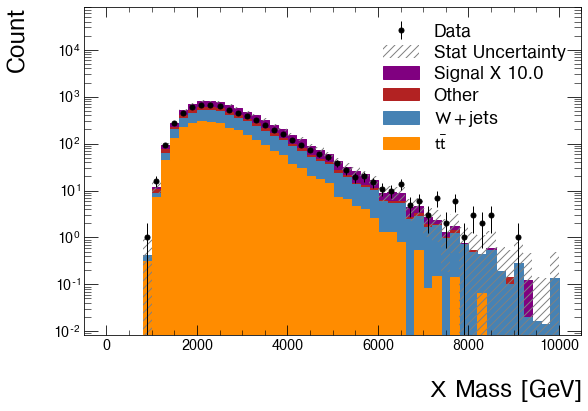

In [4]:
ax = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    scale_factors=scale_factors,
)
ax = heputils.plot.data_hist(data_hist, ax=ax);

In [5]:
ax.figure.savefig("example_stack.png")

Can also give the data histogram directly to `heputils.plot.stack_hist`

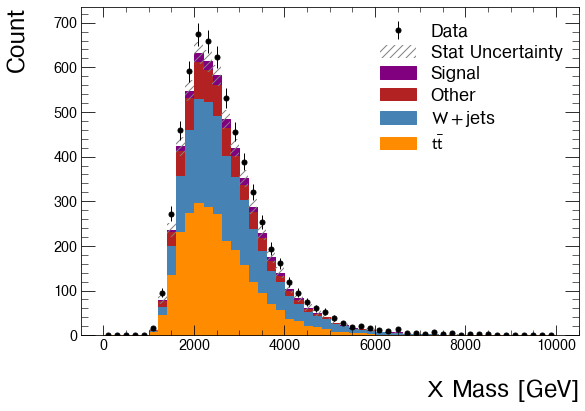

In [6]:
ax, artists = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    return_artists=True,
)

Can easily plot on a `subplots` grid

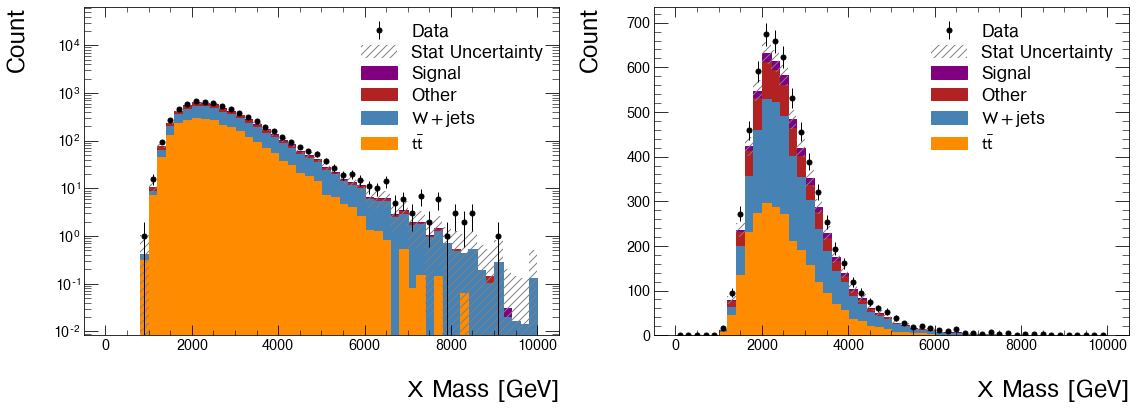

In [7]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    ax=axs[0],
)
axs[1] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    ax=axs[1],
)

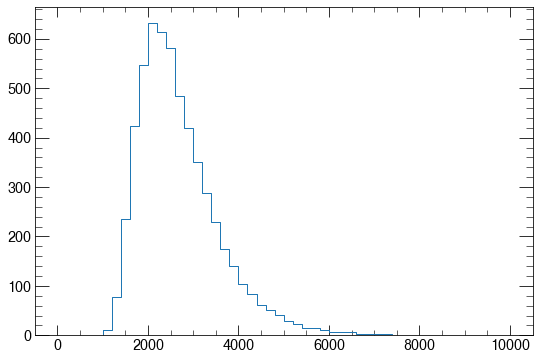

In [8]:
stacked_hist = heputils.convert.stack_hists(simulation_hists)
stacked_hist.plot();

In [9]:
stacked_hist

Hist(Regular(50, 0, 10000, label='Axis 0'), storage=Double()) # Sum: 5680.492882434512